In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

In [3]:
pd.set_option('display.float_format', lambda x: '%.5e' % x)

# Load the Fisher Matrix with Priors

In [4]:
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]
f1 = pd.DataFrame(np.loadtxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_ccl/fisher_out_with_priors.dat"), index=paras, columns=paras)
f2 = pd.DataFrame(np.loadtxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_cosmosis/fisher_out_with_priors.dat"), index=paras, columns=paras)
f1

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.45464e+07,-1.47081e+06,5.35563e+06,8.05472e+14,-8.24839e+06,1.37358e+06,-4.74889e+05
$w_0$,-1.47081e+06,1.50297e+05,-5.42817e+05,-8.18693e+13,8.39390e+05,-1.35373e+05,4.86216e+04
$h_0$,5.35563e+06,-5.42817e+05,2.00914e+06,2.97480e+14,-3.06428e+06,5.06144e+05,-1.75761e+05
$A_s$,8.05472e+14,-8.18693e+13,2.97480e+14,4.48259e+22,-4.60361e+14,7.52718e+13,-2.65174e+13
$\Omega_b$,-8.24839e+06,8.39390e+05,-3.06428e+06,-4.60361e+14,7.08991e+06,-7.80937e+05,2.73063e+05
$n_s$,1.37358e+06,-1.35373e+05,5.06144e+05,7.52718e+13,-7.80937e+05,1.42050e+05,-4.36704e+04
$w_a$,-4.74889e+05,4.86216e+04,-1.75761e+05,-2.65174e+13,2.73063e+05,-4.36704e+04,1.57742e+04


In [5]:
f2

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.45457e+07,-1.46799e+06,5.35388e+06,8.05954e+14,-8.26065e+06,1.37372e+06,-4.74797e+05
$w_0$,-1.46799e+06,1.49720e+05,-5.41522e+05,-8.17442e+13,8.38920e+05,-1.35190e+05,4.85080e+04
$h_0$,5.35388e+06,-5.41522e+05,2.00772e+06,2.97532e+14,-3.06859e+06,5.06169e+05,-1.75659e+05
$A_s$,8.05954e+14,-8.17442e+13,2.97532e+14,4.48732e+22,-4.61500e+14,7.53439e+13,-2.65283e+13
$\Omega_b$,-8.26065e+06,8.38920e+05,-3.06859e+06,-4.61500e+14,7.11819e+06,-7.81080e+05,2.73747e+05
$n_s$,1.37372e+06,-1.35190e+05,5.06169e+05,7.53439e+13,-7.81080e+05,1.42137e+05,-4.36405e+04
$w_a$,-4.74797e+05,4.85080e+04,-1.75659e+05,-2.65283e+13,2.73747e+05,-4.36405e+04,1.57748e+04


In [6]:
((f2- f1)/f1).style.background_gradient(cmap=cmap, axis=None).set_caption("Fisher Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,-4.68171e-05,-0.00191895,-0.000326295,0.000598432,0.0014859,0.000101374,-0.000193318
$w_0$,-0.00191895,-0.00384416,-0.00238524,-0.00152741,-0.000560797,-0.00135543,-0.00233763
$h_0$,-0.000326295,-0.00238524,-0.000708505,0.000177489,0.0014063,4.82369e-05,-0.000584382
$A_s$,0.000598432,-0.00152741,0.000177489,0.00105413,0.00247392,0.000957028,0.00041104
$\Omega_b$,0.0014859,-0.000560797,0.0014063,0.00247392,0.00398832,0.00018361,0.00250707
$n_s$,0.000101374,-0.00135543,4.82369e-05,0.000957028,0.00018361,0.000614762,-0.000683428
$w_a$,-0.000193318,-0.00233763,-0.000584382,0.00041104,0.00250707,-0.000683428,3.31873e-05


In [9]:
# ((f2- f1)/f1).to_csv("SRD/ccl_cosmosis_fisher_priors_rel_diff.csv")

Calculate the covariances

In [7]:
c1 = pd.DataFrame(np.linalg.inv(f1.values), columns=paras, index=paras)
c2 = pd.DataFrame(np.linalg.inv(f2.values), columns=paras, index=paras)

In [8]:
((c2- c1)/c1).style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,-0.420993,-0.547461,-0.384959,-0.372454,-0.596521,-0.505718,-0.513815
$w_0$,-0.547461,-0.56368,-0.618139,-0.566023,-0.247797,-0.573564,-0.582141
$h_0$,-0.384959,-0.618139,-0.00352276,-1.76636,0.162945,0.352606,-0.337632
$A_s$,-0.372454,-0.566023,-1.76636,-0.212063,-0.166362,-0.971851,-0.379343
$\Omega_b$,-0.596521,-0.247797,0.162945,-0.166362,-0.000858431,0.246396,-0.11168
$n_s$,-0.505718,-0.573564,0.352606,-0.971851,0.246396,-0.236886,-0.896957
$w_a$,-0.513815,-0.582141,-0.337632,-0.379343,-0.11168,-0.896957,-0.477885


In [10]:
# ((c2- c1)/c1).to_csv("SRD/ccl_cosmosis_cov_priors_rel_diff.csv")

# Eigenvalues

### First, using `np.eig`

In [9]:
w1, v1 = np.linalg.eig(f1)
w2, v2 = np.linalg.eig(f2)

In [10]:
eigenvalues_df = pd.DataFrame(np.vstack((w1, w2)).T, columns=["original", "changed"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.original - eigenvalues_df.changed)/(eigenvalues_df.original)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(v1[:, i], v2[:, i]) for i in range(len(v1))]
eigenvalues_df = eigenvalues_df.sort_values("original", axis=0).reset_index(drop=True)
eigenvalues_df.style.set_caption("Eigenvalues from `np.eig`")

,original,changed,relative difference,dot product of resp. eigenvecs
0,27.31,30.6147,-0.121006,0.0394867
1,486.592,527.598,-0.084273,0.208104
2,13901.4,13887.2,0.00101981,0.642672
3,37004.9,36962.6,0.00114414,0.918955
4,2.36208e+06,2.37193e+06,-0.00416758,0.999875
5,8.38861e+06,0,1,1
6,4.48259e+22,4.48732e+22,-0.00105413,1


### Second, using `np.eigh`

In [11]:
w1, v1 = np.linalg.eigh(f1)
w2, v2 = np.linalg.eigh(f2)

In [12]:
eigenvalues_df2 = pd.DataFrame(np.vstack((w1, w2)).T, columns=["original", "changed"])
eigenvalues_df2["relative difference"] = \
    ((eigenvalues_df2.original - eigenvalues_df2.changed)/(eigenvalues_df2.original)).fillna(0)
eigenvalues_df2["dot product of resp. eigenvecs"] = [np.dot(v1[:, i], v2[:, i]) for i in range(len(v1))]
# eigenvalues_df2 = eigenvalues_df2.sort_values("original", axis=0).reset_index(drop=True)
eigenvalues_df2.style.set_caption("Eigenvalues from `np.eig`")

,original,changed,relative difference,dot product of resp. eigenvecs
0,-299.293,-285.299,0.0467554,0.999679
1,54.8052,49.6995,0.0931601,0.999681
2,13852.6,13840,0.000909236,0.999994
3,36972.9,36932.1,0.0011039,-0.999999
4,2.36199e+06,2.3718e+06,-0.00415145,-0.999999
5,8.3884e+06,8.38846e+06,-7.43414e-06,1
6,4.48259e+22,4.48732e+22,-0.00105413,1


### Check the relative differences between eigenvalues from `np.eig` and `np.eigh`

In [13]:
((eigenvalues_df2.iloc[:, :2]-eigenvalues_df.iloc[:, :2])/eigenvalues_df.iloc[:, :2])

,original,changed
0,-1.19591e+01,-1.03190e+01
1,-8.87369e-01,-9.05800e-01
2,-3.50518e-03,-3.39488e-03
3,-8.64235e-04,-8.23986e-04
4,-3.93575e-05,-5.54233e-05
5,-2.47408e-05,inf
6,-1.87137e-16,-1.86940e-16


#### Scaled Fisher Matrix

In [5]:
A_s_scaler = np.identity(len(f1))
A_s_scaler[3,3] = 1e-9
f1_scaled = np.dot(A_s_scaler,np.dot(f1, A_s_scaler))
f2_scaled = np.dot(A_s_scaler,np.dot(f2, A_s_scaler))

In [8]:
np.savetxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_ccl/scaled_fisher_out_with_priors.dat", f1_scaled)
np.savetxt("ccl_cosmosis_binned_comparison/om_m_0.25/A_s_2.1e-9/out_cosmosis/scaled_fisher_out_with_priors.dat", f2_scaled)

### First, using `np.eig`

In [15]:
w1, v1 = np.linalg.eig(f1_scaled)
w2, v2 = np.linalg.eig(f2_scaled)

In [16]:
eigenvalues_df = pd.DataFrame(np.vstack((w1, w2)).T, columns=["original", "changed"])
eigenvalues_df["relative difference"] = \
    ((eigenvalues_df.original - eigenvalues_df.changed)/(eigenvalues_df.original)).fillna(0)
eigenvalues_df["dot product of resp. eigenvecs"] = [np.dot(v1[:, i], v2[:, i]) for i in range(len(v1))]
eigenvalues_df = eigenvalues_df.sort_values("original", axis=0).reset_index(drop=True)
eigenvalues_df.style.set_caption("Eigenvalues from `np.eig`")

,original,changed,relative difference,dot product of resp. eigenvecs
0,4.85376,8.72545,-0.797669,0.993896
1,96.3042,111.037,-0.152986,0.993318
2,621.79,631.442,-0.0155243,0.999205
3,13531.6,13550.5,-0.00139706,0.999957
4,32735.8,32517.2,0.00667662,0.999972
5,1.83199e+06,1.841e+06,-0.00491891,0.999999
6,2.21194e+07,2.21363e+07,-0.000763571,1


### Second, using `np.eigh`

In [17]:
w1, v1 = np.linalg.eigh(f1)
w2, v2 = np.linalg.eigh(f2)

In [18]:
eigenvalues_df2 = pd.DataFrame(np.vstack((w1, w2)).T, columns=["original", "changed"])
eigenvalues_df2["relative difference"] = \
    ((eigenvalues_df2.original - eigenvalues_df2.changed)/(eigenvalues_df2.original)).fillna(0)
eigenvalues_df2["dot product of resp. eigenvecs"] = [np.dot(v1[:, i], v2[:, i]) for i in range(len(v1))]
# eigenvalues_df2 = eigenvalues_df2.sort_values("original", axis=0).reset_index(drop=True)
eigenvalues_df2.style.set_caption("Eigenvalues from `np.eig`")

,original,changed,relative difference,dot product of resp. eigenvecs
0,-299.293,-285.299,0.0467554,0.999679
1,54.8052,49.6995,0.0931601,0.999681
2,13852.6,13840,0.000909236,0.999994
3,36972.9,36932.1,0.0011039,-0.999999
4,2.36199e+06,2.3718e+06,-0.00415145,-0.999999
5,8.3884e+06,8.38846e+06,-7.43414e-06,1
6,4.48259e+22,4.48732e+22,-0.00105413,1


### Check the relative differences between eigenvalues from `np.eig` and `np.eigh`

In [19]:
((eigenvalues_df2.iloc[:, :2]-eigenvalues_df.iloc[:, :2])/eigenvalues_df.iloc[:, :2])

,original,changed
0,-6.26621e+01,-3.36974e+01
1,-4.30916e-01,-5.52407e-01
2,2.12787e+01,2.09181e+01
3,1.73235e+00,1.72552e+00
4,7.11531e+01,7.19396e+01
5,3.57885e+00,3.55647e+00
6,2.02655e+15,2.02713e+15


# Playing with Inversion Routines

In [20]:
cond1 = np.linalg.cond(f1)
cond2 = np.linalg.cond(f2)
cond1_scaled = np.linalg.cond(f1_scaled)
cond2_scaled = np.linalg.cond(f2_scaled)
print("The condition number of CCL's fisher matrix is:", np.linalg.cond(f1))
print("The condition number of Cosmosis' fisher matrix is:", np.linalg.cond(f2))
print("The condition number of CCL's scaled fisher matrix is:", np.linalg.cond(f1_scaled))
print("The condition number of Cosmosis' scaled fisher matrix is:", np.linalg.cond(f2_scaled))

The condition number of CCL's fisher matrix is: 7.507393132862052e+21
The condition number of Cosmosis' fisher matrix is: 3.8150172246354716e+21
The condition number of CCL's scaled fisher matrix is: 4557166.596399599
The condition number of Cosmosis' scaled fisher matrix is: 2536978.4832626656


The condition numbers are much larger than 1, so the inverse is sensitive to changes in the input data and roundoff errors in the solution process.

### Method 0  Regular `np.linalg.inv`
This does LU decomposition 

In [12]:
cov1_lu = pd.DataFrame(np.linalg.inv(f1), index=paras, columns=paras)
cov2_lu = pd.DataFrame(np.linalg.inv(f2), index=paras, columns=paras)

In [22]:
((cov2_lu-cov1_lu)/cov1_lu)\
.style.background_gradient(cmap=cmap, axis=None).set_caption("LU Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,-0.420993,-0.547461,-0.384959,-0.372454,-0.596521,-0.505718,-0.513815
$w_0$,-0.547461,-0.56368,-0.618139,-0.566023,-0.247797,-0.573564,-0.582141
$h_0$,-0.384959,-0.618139,-0.00352276,-1.76636,0.162945,0.352606,-0.337632
$A_s$,-0.372454,-0.566023,-1.76636,-0.212063,-0.166362,-0.971851,-0.379343
$\Omega_b$,-0.596521,-0.247797,0.162945,-0.166362,-0.000858431,0.246396,-0.11168
$n_s$,-0.505718,-0.573564,0.352606,-0.971851,0.246396,-0.236886,-0.896957
$w_a$,-0.513815,-0.582141,-0.337632,-0.379343,-0.11168,-0.896957,-0.477885


Check that the fisher matrix times the covarince is 1

In [23]:
f1.dot(cov1_lu)

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.00000e+00,-4.11959e-12,-1.36656e-14,5.92027e-25,-1.67441e-15,5.52963e-14,1.21744e-11
$w_0$,1.00444e-14,1.00000e+00,5.63227e-16,3.76839e-22,1.50752e-16,2.44318e-14,-3.53611e-13
$h_0$,5.86795e-14,-1.07465e-13,1.00000e+00,-7.85788e-22,8.34551e-16,-6.61863e-14,-1.04635e-12
$A_s$,-6.08237e-06,-1.07557e-04,1.70890e-06,1.00000e+00,-1.38459e-07,-4.64040e-06,7.47493e-04
$\Omega_b$,3.07326e-13,7.50855e-13,-5.57187e-15,-1.40299e-21,1.00000e+00,5.27586e-15,-5.52383e-12
$n_s$,-1.77730e-14,-2.30388e-13,-1.45399e-15,-5.49370e-22,-5.23391e-18,1.00000e+00,4.35640e-13
$w_a$,1.32680e-15,1.62352e-13,1.80393e-17,-1.17648e-22,5.86321e-17,1.05432e-14,1.00000e+00


In [24]:
f2.dot(cov2_lu)

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.00000e+00,-1.03217e-12,4.67384e-14,6.31192e-21,-1.18270e-15,-2.46698e-14,-4.57359e-12
$w_0$,2.80206e-15,1.00000e+00,-3.10706e-15,-3.47126e-22,1.20863e-16,2.66945e-15,-1.16135e-13
$h_0$,9.43432e-14,5.78550e-13,1.00000e+00,-1.41486e-21,-3.78872e-18,-4.83028e-14,-1.45991e-12
$A_s$,4.98033e-06,3.12483e-06,8.44974e-07,1.00000e+00,1.00426e-08,-6.96694e-06,-1.48917e-04
$\Omega_b$,-1.31389e-13,-1.47989e-12,-5.09327e-16,2.82705e-21,1.00000e+00,3.35228e-14,5.90044e-12
$n_s$,-1.07850e-14,-3.13627e-14,2.04953e-15,-1.23017e-22,-4.65847e-17,1.00000e+00,1.80435e-14
$w_a$,-7.80803e-15,-1.05128e-13,-8.66936e-16,2.57065e-23,6.52483e-17,2.03970e-15,1.00000e+00


### Method 1 `sp.linalg.cho_solve`
Since the fisher matrix is symmetric, we can use cholesky decomposition to compute the inverse instead of LU decomposition as `numpy.linalg.inv` does 

In [25]:
def cholesky_inv(A):
    # use cholesky decomposition to solve A*X = I, where X is the inverse
    return sp.linalg.cho_solve(sp.linalg.cho_factor(A), np.eye(len(A)))

In [26]:
cov1_cho = pd.DataFrame(cholesky_inv(f1), index=paras, columns=paras)
cov2_cho = pd.DataFrame(cholesky_inv(f2), index=paras, columns=paras)

In [27]:
((cov2_cho-cov1_cho)/cov1_cho).style.background_gradient(cmap=cmap, axis=None).set_caption("Cholesky Covariance Relative Differences")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,-0.420993,-0.547461,-0.384959,-0.372454,-0.596521,-0.505718,-0.513815
$w_0$,-0.547461,-0.56368,-0.618139,-0.566023,-0.247797,-0.573564,-0.582141
$h_0$,-0.384959,-0.618139,-0.00352276,-1.76636,0.162945,0.352606,-0.337632
$A_s$,-0.372454,-0.566023,-1.76636,-0.212063,-0.166362,-0.971851,-0.379343
$\Omega_b$,-0.596521,-0.247797,0.162945,-0.166362,-0.000858431,0.246396,-0.11168
$n_s$,-0.505718,-0.573564,0.352606,-0.971851,0.246396,-0.236886,-0.896957
$w_a$,-0.513815,-0.582141,-0.337632,-0.379343,-0.11168,-0.896957,-0.477885


Check that the fisher matrix times the covarince is 1

In [28]:
f1.dot(cov1_cho)

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.00000e+00,4.97010e-12,-3.22758e-14,7.82534e-23,-2.86340e-17,2.40589e-13,1.50134e-11
$w_0$,-5.79398e-14,1.00000e+00,6.50523e-15,1.08948e-21,1.85161e-17,4.73831e-14,-1.41110e-13
$h_0$,-6.91491e-14,1.07150e-12,1.00000e+00,6.21622e-22,-1.03078e-15,7.94028e-14,5.69807e-12
$A_s$,5.06906e-05,7.38322e-04,-6.34706e-06,1.00000e+00,1.39613e-07,-4.60306e-05,-8.82838e-04
$\Omega_b$,-4.59557e-13,-6.31274e-12,4.26508e-14,6.94810e-21,1.00000e+00,3.83498e-13,1.05335e-11
$n_s$,1.07400e-13,1.40822e-12,-1.36643e-14,-2.00062e-21,4.62511e-16,1.00000e+00,-2.38655e-12
$w_a$,3.77903e-14,8.89428e-14,1.43132e-15,-5.84256e-22,1.74638e-16,-2.58282e-14,1.00000e+00


In [29]:
f2.dot(cov2_cho)

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,1.00000e+00,-9.53201e-13,8.04924e-15,-1.90409e-21,-7.38357e-16,-6.72834e-14,1.70301e-12
$w_0$,-3.72923e-14,1.00000e+00,-3.11245e-15,-3.92621e-23,9.87905e-17,2.35811e-14,2.77030e-13
$h_0$,-6.47023e-15,-4.35251e-13,1.00000e+00,1.34059e-21,4.38135e-17,-3.74082e-14,-1.00062e-12
$A_s$,5.66904e-07,1.69083e-05,4.91514e-08,1.00000e+00,-1.59959e-07,-1.55527e-05,1.15573e-04
$\Omega_b$,3.36512e-13,2.65260e-12,-3.33324e-14,-5.77381e-21,1.00000e+00,-1.77382e-13,-1.07718e-11
$n_s$,2.80460e-14,8.89805e-14,-1.89475e-15,-5.85432e-22,2.49135e-16,1.00000e+00,-5.31202e-13
$w_a$,5.33218e-15,6.13645e-14,-6.78310e-16,-1.43505e-22,8.18185e-17,4.04295e-15,1.00000e+00


Check the relative differences between the inverse from LU decomposition and the inverse from Cholesky decomposition

In [30]:
((cov1_cho-cov1_lu)/cov1_lu)\
.style.background_gradient(cmap=cmap, axis=None).set_caption("Covariance Relative Differences between LU and Cholesky")

,$\Omega_m$,$w_0$,$h_0$,$A_s$,$\Omega_b$,$n_s$,$w_a$
$\Omega_m$,-1.9031e-12,-2.09216e-12,-1.94765e-12,-1.89684e-12,-4.59777e-12,-1.88291e-12,-2.09142e-12
$w_0$,-2.00862e-12,-1.79953e-12,-2.39837e-12,-2.24194e-12,-1.58641e-12,-1.85377e-12,-1.93823e-12
$h_0$,-1.21555e-12,-1.48657e-12,-4.22393e-15,-6.77486e-12,6.36077e-13,8.90479e-13,-8.80648e-13
$A_s$,-2.32026e-12,-2.8418e-12,-1.27447e-11,-1.65272e-12,-2.86376e-12,-4.38843e-12,-2.13073e-12
$\Omega_b$,-7.49304e-12,-2.64075e-12,1.78823e-12,-3.9507e-12,-7.93348e-15,1.82278e-12,-1.62575e-12
$n_s$,-1.3785e-12,-1.43279e-12,1.10631e-12,-2.60684e-12,8.89523e-13,-6.46059e-13,-2.21414e-12
$w_a$,-2.32387e-12,-2.23493e-12,-1.59802e-12,-1.94819e-12,-1.10039e-12,-3.33e-12,-1.96442e-12


## Bounds on norm of inverse

see https://nvlpubs.nist.gov/nistpubs/jres/78B/jresv78Bn2p65_A1b.pdf

Let $A$ be a nonsingular matrix, $X$ is an approx inverse to $A$ such that $N(R) < 1 $ where $R = I - AX$ and $N$ is any matrix norm, then 
$$
\frac{N(XR)}{1+N(R)} \leq N(A^{-1} - X) \leq \frac{N(XR)}{1-N(R)}
$$
Below, we use the Frobenius/Euclidean norm:
$$
N(A) = \sqrt{\sum_{i=1}^n\sum_{j=i}^n |a_{ij}|^2}
$$

Since an accurate inverse would lead to $A^{-1} -X$ being close to $0$, we expect $N(A^{-1}-X)$ to be close to $0$

In [31]:
# finds the bounds from above
def get_bounds(A, inv_func, norm=None):
    X = inv_func(A)
    R = np.eye(len(A)) - np.dot(A, X)
    lower = norm(np.dot(X, R))/(1 + norm(R))
    upper = norm(np.dot(X, R))/(1 - norm(R))
    return lower, upper

#### using regular `np.linalg.inv`

In [32]:
lu_l1, lu_u1 = get_bounds(f1, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l1, lu_u1, lu_u1-lu_l1))

For the regular numpy inverse,
the lower bound is 6.542181e-14,
the upper bound is 6.552070e-14,
and the spread is 9.889198e-17


In [33]:
lu_l2, lu_u2 = get_bounds(f2, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l2, lu_u2, lu_u2-lu_l2))

For the regular numpy inverse,
the lower bound is 4.190658e-14,
the upper bound is 4.191909e-14,
and the spread is 1.250660e-17


In [34]:
lu_l1_scaled, lu_u1_scaled = get_bounds(f1_scaled, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l1_scaled, lu_u1_scaled, lu_u1_scaled-lu_l1_scaled))

For the regular numpy inverse,
the lower bound is 1.007875e-13,
the upper bound is 1.007875e-13,
and the spread is 3.070348e-24


In [35]:
lu_l2_scaled, lu_u2_scaled = get_bounds(f2_scaled, np.linalg.inv, sp.linalg.norm) # this uses the 2-norm
print("For the regular numpy inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(lu_l2_scaled, lu_u2_scaled, lu_u2_scaled-lu_l2_scaled))

For the regular numpy inverse,
the lower bound is 7.075997e-14,
the upper bound is 7.075997e-14,
and the spread is 5.013369e-25


#### using `cholesky` inverse

In [36]:
cho_l1, cho_u1 = get_bounds(f1, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the cholesky inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l1,cho_u1, cho_u1-cho_l1))

For the cholesky inverse,
the lower bound is 3.064389e-13,
the upper bound is 3.071463e-13,
and the spread is 7.074219e-16


In [37]:
cho_l2, cho_u2 = get_bounds(f2, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the cholesky inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l2,cho_u2, cho_u2-cho_l2))

For the cholesky inverse,
the lower bound is 3.389212e-14,
the upper bound is 3.390011e-14,
and the spread is 7.988367e-18


In [38]:
cho_l1_scaled, cho_u1_scaled = get_bounds(f1_scaled, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the cholesky inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l1_scaled,cho_u1_scaled, cho_u1_scaled-cho_l1_scaled))

For the cholesky inverse,
the lower bound is 5.081131e-13,
the upper bound is 5.081131e-13,
and the spread is 4.162722e-23


In [39]:
cho_l2_scaled, cho_u2_scaled = get_bounds(f2_scaled, cholesky_inv, sp.linalg.norm) # this uses the 2-norm
print("For the cholesky inverse,\nthe lower bound is %e,\nthe upper bound is %e,\nand the spread is %e"%(cho_l2_scaled,cho_u2_scaled, cho_u2_scaled-cho_l2_scaled))

For the cholesky inverse,
the lower bound is 6.417397e-14,
the upper bound is 6.417397e-14,
and the spread is 1.083377e-24


**Note**: In both cases, we get a very tight spread, i.e., the inverse seems to be accurate

# Figure of Merit Comparisons

In [40]:
paras = ["$\Omega_m$", "$w_0$", "$h_0$", "$A_s$", "$\Omega_b$", "$n_s$", "$w_a$"]

# some functions to calculate the figure of merit for any pair of parameters
def marg_cov(cov, para1, para2):
    ind1 = paras.index(para1)
    ind2 = paras.index(para2)
    inds = np.asarray((ind1, ind2))
    # first get all indeces to remove
    all_cov_inds = range(len(cov[0]))
    del_inds = np.delete(all_cov_inds, inds)
    # then delete rows and cols
    marged_cov = np.delete(np.delete(cov, del_inds, 0), del_inds, 1)
    return marged_cov

def calc_fom(cov):
    # takes marg cov matrix
    # inverts it to get reduced fisher matrix
    # returns sqrt of det of fisher matrix
    fisher = np.linalg.inv(cov)
    FOM = np.sqrt(np.linalg.det(fisher))
    return FOM

def fom(fisher, para1, para2, inv=np.linalg.inv):
    cov = inv(fisher)
    marged_cov = marg_cov(cov, para1, para2)
    return calc_fom(marged_cov)

In [41]:
# plotting helper function
def plot_cov_ellipse(cov, pos, nstd=1, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the
    ellipse patch artist.
    Parameters
    ----------
    cov :  The 2x2 covariance matrix to base the ellipse on
    pos :  The location of the center of the ellipse. Expects a 2-element
           sequence of [x0, y0].
    nstd : The radius of the ellipse in numbers of standard deviations.
           Defaults to 2 standard deviations.
    ax :   The axis that the ellipse will be plotted on. Defaults to the
           current axis.
    Additional keyword arguments are pass on to the ellipse patch.

    Returns:
    -------
    A matplotlib ellipse artist
    """

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    #print vals, vecs

    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Calculate chi squared correction for ellipse
    # Uses chi2 pdf with 2 degrees of freedom
    # note ppf is the quantile function
    def chi2correction(nstd):

        def get_conf_level(ntsd):
            # if X ~ N(u, s) gaussian,
            # then this function returns
            # Pr(u - ntsd*s < X < u + ntsd*s)
            # 
            # nstd 1 -> .6827
            # ntsd 2 -> .9545
            # ntsd 3 -> .9973
            return 1 - (1 - norm().cdf(ntsd))*2
        
        conf_level = get_conf_level(nstd)
        return np.sqrt(chi2(2).ppf(conf_level))

    # Width and height are "full" widths, not radius
    width, height = 2 * chi2correction(nstd) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    ellip.set_facecolor('none')
    plt.gca().add_patch(ellip)
    return ellip

### FoM for $w_0$ and $w_a$

In [42]:
w_fom1 = fom(f1, "$w_0$", "$w_a$")
w_fom2 = fom(f2, "$w_0$", "$w_a$")

In [43]:
print("Original Fisher FoM: %.4f"%w_fom1)
print("Modified Fisher FoM: %.4f"%w_fom2)
print("Relative Difference: %.4f"%((w_fom2-w_fom1)/w_fom1))

Original Fisher FoM: 47.1431
Modified Fisher FoM: 69.4124
Relative Difference: 0.4724


Plot the ellipses

In [44]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

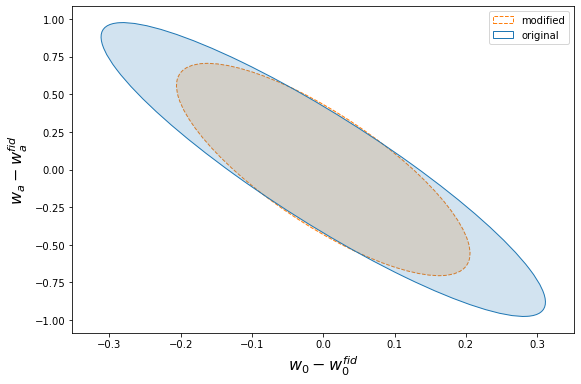

In [45]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(f1), "$w_0$", "$w_a$")
mc2 = marg_cov(np.linalg.inv(f2), "$w_0$", "$w_a$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$w_0 - w_0^{fid}$', fontsize=16)
plt.ylabel(r'$w_a - w_a^{fid}$', fontsize=16)
plt.show()

### FoM for $w_0$ and $w_a$ from scaled Fishers

In [46]:
w_fom1_scaled = fom(f1_scaled, "$w_0$", "$w_a$")
w_fom2_scaled = fom(f2_scaled, "$w_0$", "$w_a$")

In [47]:
print("Original Fisher FoM: %.4f"%w_fom1_scaled)
print("Modified Fisher FoM: %.4f"%w_fom2_scaled)
print("Relative Difference: %.4f"%((w_fom2_scaled-w_fom1_scaled)/w_fom1_scaled))

Original Fisher FoM: 47.1431
Modified Fisher FoM: 69.4124
Relative Difference: 0.4724


Plot the ellipses

In [48]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

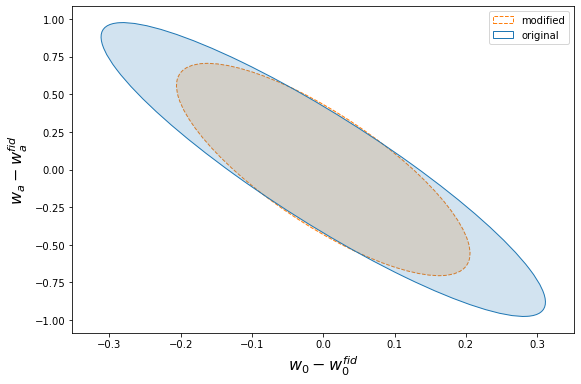

In [49]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(f1_scaled), "$w_0$", "$w_a$")
mc2 = marg_cov(np.linalg.inv(f2_scaled), "$w_0$", "$w_a$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$w_0 - w_0^{fid}$', fontsize=16)
plt.ylabel(r'$w_a - w_a^{fid}$', fontsize=16)
plt.show()

### FoM for $\Omega_m$ and $A_s$

In [50]:
om_fom1 = fom(f1, "$\Omega_m$", "$A_s$")
om_fom2 = fom(f2, "$\Omega_m$", "$A_s$")

In [51]:
print("Original Fisher FoM: %.4f"%om_fom1)
print("Modified Fisher FoM: %.4f"%om_fom2)
print("Relative Difference: %.4f"%((om_fom2-om_fom1)/om_fom1))

Original Fisher FoM: 722437301175.6017
Modified Fisher FoM: 925590354118.1354
Relative Difference: 0.2812


Plot the ellipses

In [52]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

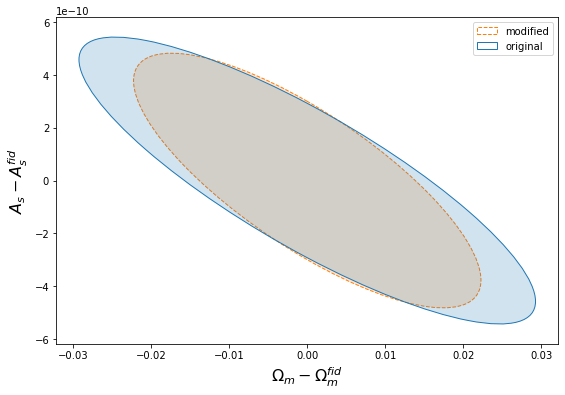

In [53]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(f1), "$\Omega_m$", "$A_s$")
mc2 = marg_cov(np.linalg.inv(f2), "$\Omega_m$", "$A_s$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$\Omega_m - \Omega_m^{fid}$', fontsize=16)
plt.ylabel(r'$A_s - A_s^{fid}$', fontsize=16)
plt.show()

### FoM for $\Omega_m$ and $10^9 A_s$ for scaled Fishers

In [54]:
om_fom1_scaled = fom(f1_scaled, "$\Omega_m$", "$A_s$")
om_fom2_scaled = fom(f2_scaled, "$\Omega_m$", "$A_s$")

In [55]:
print("Original Fisher FoM: %.4f"%om_fom1_scaled)
print("Modified Fisher FoM: %.4f"%om_fom2_scaled)
print("Relative Difference: %.4f"%((om_fom2_scaled-om_fom1_scaled)/om_fom1_scaled))

Original Fisher FoM: 722.4373
Modified Fisher FoM: 925.5904
Relative Difference: 0.2812


Plot the ellipses

In [56]:
from scipy.stats import norm, chi2
from matplotlib.patches import Ellipse

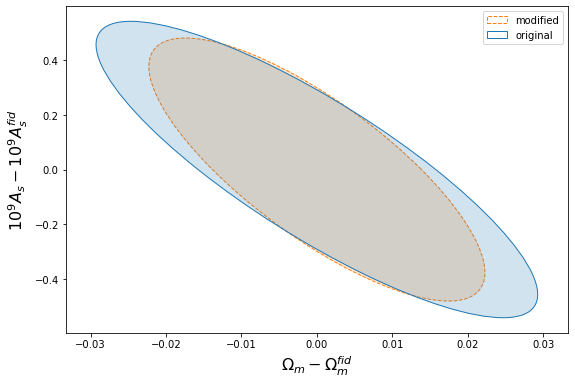

In [57]:
plt.subplots(figsize=(9,6))

mc1 = marg_cov(np.linalg.inv(f1_scaled), "$\Omega_m$", "$A_s$")
mc2 = marg_cov(np.linalg.inv(f2_scaled), "$\Omega_m$", "$A_s$")

el2 = plot_cov_ellipse(mc2, (0,0), nstd=2)
el2.set_facecolor("C1")
el2.set_alpha(0.2)
el2 = plot_cov_ellipse(mc2, (0,0), nstd=2, label="modified", linestyle="--")
el2.set_edgecolor("C1")

el1 = plot_cov_ellipse(mc1, (0,0), nstd=2)
el1.set_facecolor("C0")
el1.set_alpha(0.2)
el1 = plot_cov_ellipse(mc1, (0,0), nstd=2, label="original")
el1.set_edgecolor("C0")

plt.autoscale()
plt.legend()
plt.xlabel(r'$\Omega_m - \Omega_m^{fid}$', fontsize=16)
plt.ylabel(r'$10^9A_s - 10^9A_s^{fid}$', fontsize=16)
plt.show()

# Save info of matrices out 

Make an array containing:
1. condition number
2. w0_wa FoM
3. om_m A_s FoM
3. om_m sigma_8 FoM
4. Spread on Norm of LU Inverse - Actual Inverse
4. Spread on Norm of Cholesky Inverse - Actual Inverse

In [58]:
info1 = np.array([cond1, w_fom1, om_fom1, np.nan, np.NaN, lu_u1-lu_l1, cho_u1-cho_l1])
info2 = np.array([cond2, w_fom2, om_fom2, np.nan, np.NaN, lu_u2-lu_l2, cho_u2-cho_l2])

In [59]:
info1_scaled = np.array([cond1_scaled, w_fom1_scaled, np.nan, om_fom1_scaled, np.NaN, lu_u1_scaled-lu_l1_scaled, cho_u1_scaled-cho_l1_scaled])
info2_scaled = np.array([cond2_scaled, w_fom2_scaled, np.nan, om_fom2_scaled, np.NaN, lu_u2_scaled-lu_l2_scaled, cho_u2_scaled-cho_l2_scaled])

In [60]:
np.savetxt("SRD/ccl_prior_info.txt", info1)
np.savetxt("SRD/cosmosis_prior_info.txt", info2)

In [61]:
np.savetxt("SRD/ccl_scaled_prior_info.txt", info1_scaled)
np.savetxt("SRD/cosmosis_scaled_prior_info.txt", info2_scaled)

In [14]:
f1_scaled = pd.DataFrame(f1_scaled, index=paras, columns=paras)
f2_scaled = pd.DataFrame(f2_scaled, index=paras, columns=paras)

In [15]:
c1_scaled = pd.DataFrame(np.linalg.inv(f1_scaled.values), index=paras, columns=paras)
c2_scaled = pd.DataFrame(np.linalg.inv(f2_scaled.values), index=paras, columns=paras)

In [18]:
((f1_scaled- f2_scaled)/f1_scaled).to_csv("SRD/ccl_cosmosis_fisher_priors_scaled_rel_diff.csv")

In [19]:
((c1_scaled- c2_scaled)/c1_scaled).to_csv("SRD/ccl_cosmosis_cov_priors_scaled_rel_diff.csv")